In [175]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

web = requests.get('https://www.worldometers.info/coronavirus/')
covid_df = pd.read_html(web.text)

In [176]:
covid_df = covid_df[0]


In [177]:
covid_df.drop(['NewCases','NewDeaths','Deaths/1M pop','Tests/ 1M pop'],axis=1, inplace=True)
covid_df.fillna(0,inplace=True)
covid_df.head()

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,TotalTests
0,World,2994958,206997.0,878923.0,1909038,57603.0,384.0,0.0
1,USA,987322,55415.0,118781.0,813126,15143.0,2983.0,5470555.0
2,Spain,226629,23190.0,117727.0,85712,7764.0,4847.0,1199548.0
3,Italy,197675,26644.0,64928.0,106103,2009.0,3269.0,1757659.0
4,France,162100,22856.0,44903.0,94341,4682.0,2483.0,463662.0


In [178]:
covid_df.drop(0,axis=0,inplace=True)
covid_df.drop(213,axis=0,inplace=True)

In [179]:
covid_df.tail()

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,TotalTests
208,Sao Tome and Principe,4,0.0,0.0,4,0.0,18.00,19.0
209,Anguilla,3,0.0,1.0,2,0.0,200.00,0.0
210,Saint Pierre Miquelon,1,0.0,0.0,1,0.0,173.00,0.0
211,Yemen,1,0.0,1.0,0,0.0,0.03,120.0
212,China,82830,4633.0,77474.0,723,52.0,58.00,0.0


In [180]:
covid_df.rename(columns = {'Country,Other' : 'Countries'}, inplace=True)
covid_df.rename(columns = {'Serious,Critical' : 'CriticalCases'}, inplace=True)

covid_df.head()

,Countries,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,CriticalCases,Tot Cases/1M pop,TotalTests
1,USA,987322,55415.0,118781.0,813126,15143.0,2983.0,5470555.0
2,Spain,226629,23190.0,117727.0,85712,7764.0,4847.0,1199548.0
3,Italy,197675,26644.0,64928.0,106103,2009.0,3269.0,1757659.0
4,France,162100,22856.0,44903.0,94341,4682.0,2483.0,463662.0
5,Germany,157770,5976.0,112000.0,39794,2570.0,1883.0,2072669.0


In [181]:
deathmean = covid_df['TotalDeaths'].mean()

indexNames = covid_df[ covid_df['TotalDeaths'] <= deathmean ].index
covid_df.drop(indexNames,inplace=True)


In [182]:
y_pos = np.arange(len(covid_df))
y_pos
performance = covid_df['TotalDeaths']
postal_code = ['US','ES','IT','FR','DE','UK','TR','IR','BR','CA','BE','NL','CH','NB','SE','MX','CN']
covid_df['PostalCodes'] = postal_code
covid_df.reset_index(inplace=True)


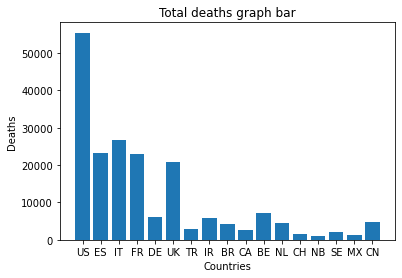

In [183]:
plt.bar(y_pos,performance)
plt.xticks(y_pos,covid_df['PostalCodes'])
plt.title('Total deaths graph bar')
plt.xlabel("Countries")
plt.ylabel("Deaths")
plt.show()